<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
# Your Code Here
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
df = df.drop('quality', axis=1)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
tr, te = train_test_split(df, train_size=0.8, test_size=0.2, random_state=1)
train = pd.DataFrame(tr)
test = pd.DataFrame(te)

In [6]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
701,7.0,0.650,0.02,2.10,0.066,8.0,25.0,0.99720,3.47,0.67,9.500000,1
56,10.2,0.420,0.57,3.40,0.070,4.0,10.0,0.99710,3.04,0.63,9.600000,0
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,1
863,7.2,0.620,0.06,2.50,0.078,17.0,84.0,0.99746,3.51,0.53,9.700000,0
1387,7.4,0.640,0.07,1.80,0.100,8.0,23.0,0.99610,3.30,0.58,9.600000,0
625,6.8,0.690,0.00,5.60,0.124,21.0,58.0,0.99970,3.46,0.72,10.200000,0
761,9.3,0.655,0.26,2.00,0.096,5.0,35.0,0.99738,3.25,0.42,9.600000,0
940,9.6,0.330,0.52,2.20,0.074,13.0,25.0,0.99509,3.36,0.76,12.400000,1
613,8.2,0.390,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.800000,0
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,1


In [7]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,0
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,1
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,1
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,1
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,1
1143,7.0,0.220,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,1
1215,8.8,0.270,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3,1
181,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,0
1186,6.6,0.800,0.03,7.8,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,0
1252,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,0


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

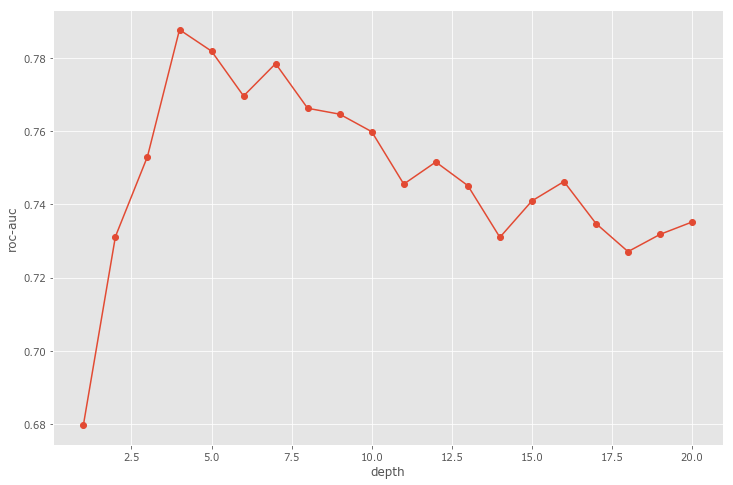

In [245]:
# Your Code Here
X, y = train.loc[:, 'fixed acidity' : 'alcohol'], train.loc[:, 'quality_cat']
tree = DecisionTreeClassifier(max_depth=1)
axisX = np.linspace(1, 20, num=20).astype(int)
axisY = np.zeros(20)
for depth in axisX:
    tree = DecisionTreeClassifier(max_depth=depth)
    axisY[depth - 1] = np.mean(cross_val_score(tree, X, y, scoring='roc_auc'))

plt.figure()
plt.plot(axisX, axisY, 'o-')
plt.xlabel('depth')
plt.ylabel('roc-auc')
plt.show()

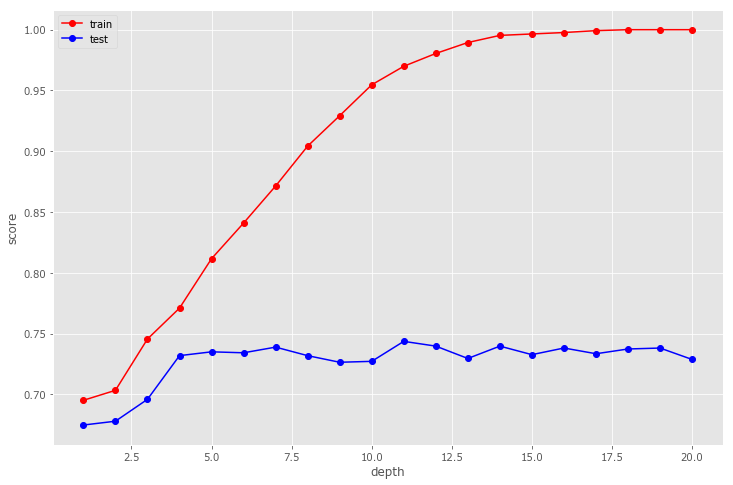

In [246]:
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, 'max_depth', axisX)
plt.figure()
plt.plot(axisX, np.mean(train_scores, axis=1), 'o-', color='r')
plt.plot(axisX, np.mean(test_scores, axis=1), 'o-', color='b')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend(['train', 'test'])
plt.figure()

Оптимальная глубина: 4-5

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [274]:
# Your Code Here
optimal_depth = 5
tree = DecisionTreeClassifier(max_depth=optimal_depth)
tree.fit(X, y)
lst = [[tree.feature_importances_[i], train.columns[:-1][i]] for i in xrange(len(tree.feature_importances_))]
lst.sort()
print "Признаки в порядке убывания важности:"
for pair in reversed(lst):
    print pair[1]

Признаки в порядке убывания важности:
alcohol
sulphates
total sulfur dioxide
volatile acidity
fixed acidity
chlorides
pH
density
free sulfur dioxide
residual sugar
citric acid


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

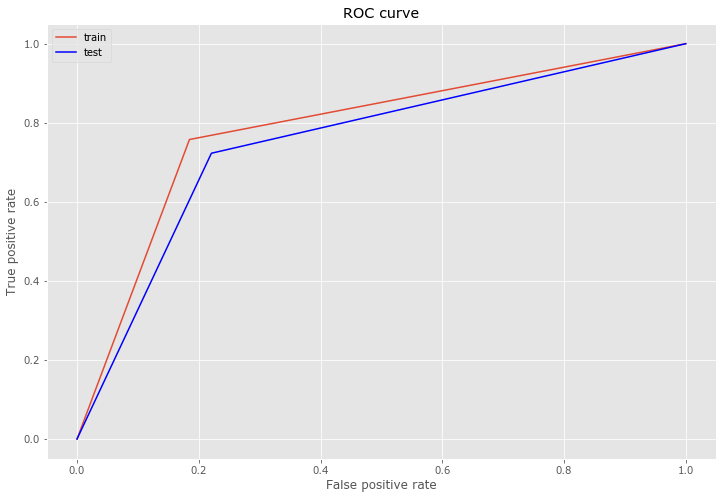

In [275]:
# Your Code Here
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score
X_train, y_train = X, y
X_test, y_test = test.loc[:, 'fixed acidity' : 'alcohol'], test.loc[:, 'quality_cat']
tree.fit(X_train, y_train)
y_predicted_train = tree.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_predicted_train)
y_predicted_test = tree.predict(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_predicted_test)
plt.figure()
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test, color='b')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['train', 'test'])
plt.title('ROC curve')
plt.show()

In [276]:
print "ROC-AUC: %f" %roc_auc_score(y_test, y_predicted_test)
print "Accuracy: %f" %accuracy_score(y_test, y_predicted_test)
print "Precision: %f" %precision_score(y_test, y_predicted_test)
print "Recall: %f" %recall_score(y_test, y_predicted_test)

ROC-AUC: 0.751056
Accuracy: 0.750000
Precision: 0.779221
Recall: 0.722892


In [277]:
#не понял, зачем условие про порог. Через вероятности и порог 0.5 результат получается такой же, как в стандартном варианте.
y_prob = tree.predict_proba(X_test)
labels = np.zeros(y_prob.shape[0]).astype(int)
for i in xrange(y_prob.shape[0]):
    if y_prob[i][0] < 0.5:
        labels[i] = 1
print np.all(labels == y_predicted_test)

True


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [278]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [279]:
# Your Code Here
print "Decision tree ROC-AUC: %f" %roc_auc_score(y_test, y_predicted_test)

Decision tree ROC-AUC: 0.751056


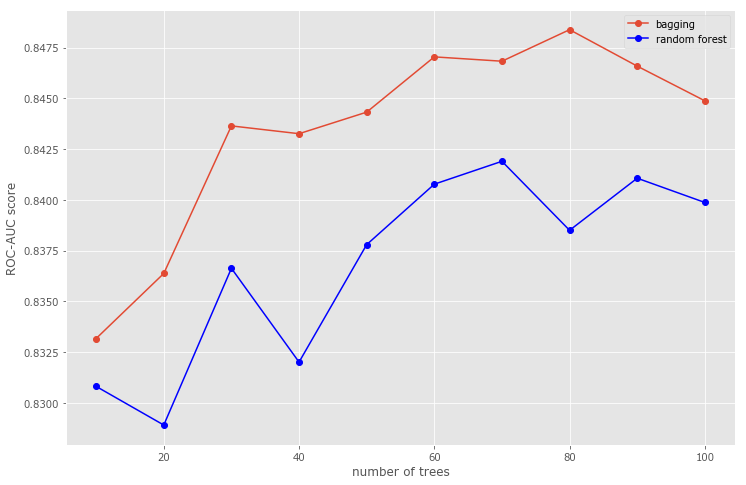

In [282]:
#Сделал двумя способами: через validation_curve и просто в цикле. Не знаю, какой больше похож на правду.
axisX = np.linspace(10, 100, 10).astype(int)
train_scores, test_scores = validation_curve(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=optimal_depth)),
                                             X_train, y_train, 'n_estimators', axisX, scoring='roc_auc')
plt.figure()
plt.plot(axisX, np.mean(test_scores, axis=1), 'o-')
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=optimal_depth),
                                             X_train, y_train, 'n_estimators', axisX, scoring='roc_auc')

plt.plot(axisX, np.mean(test_scores, axis=1), 'o-', color='b')
plt.xlabel('number of trees')
plt.ylabel('ROC-AUC score')
plt.legend(['bagging', 'random forest'])
plt.show()

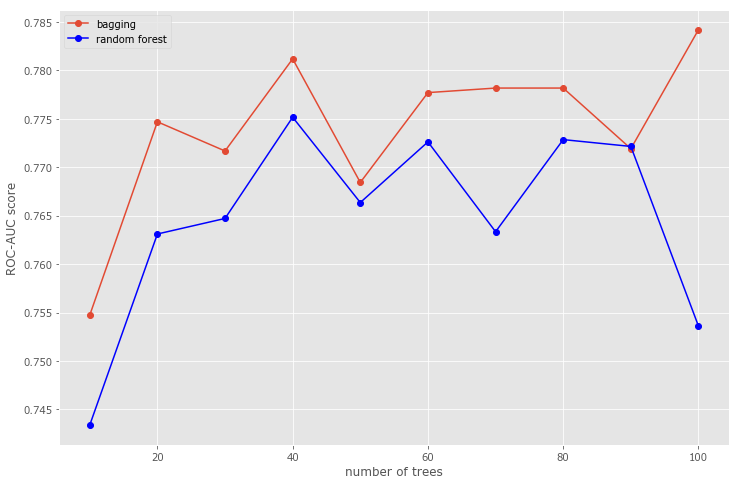

In [308]:
bagging_score = []
random_forest_score = []
for n_trees in axisX:
    bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=optimal_depth), n_estimators=n_trees)
    bagging.fit(X_train, y_train)
    bagging_score.append(roc_auc_score(y_test, bagging.predict(X_test)))
    random_forest = RandomForestClassifier(n_estimators=n_trees, max_depth=optimal_depth)
    random_forest.fit(X_train, y_train)
    random_forest_score.append(roc_auc_score(y_test, random_forest.predict(X_test)))

plt.figure()
plt.plot(axisX, np.array(bagging_score), 'o-')
plt.plot(axisX, np.array(random_forest_score), 'o-', color='b')
plt.xlabel('number of trees')
plt.ylabel('ROC-AUC score')
plt.legend(['bagging', 'random forest'])
plt.show()

Судя по первому графику, качество классификации улучшилось. По второму графику качество тажке увеличилось но незначительно.

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [316]:
# Your Code Here
grid = {'n_estimators' : [10 * k for k in xrange(1, 16)], 'max_depth': [k for k in xrange(1, 16)]}
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(RandomForestClassifier(), param_grid=grid, scoring='roc_auc')
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [317]:
print "Best params: %s" %search.best_params_
print "Quality score: %f" %search.best_score_

Best params: {'n_estimators': 150, 'max_depth': 13}
Quality score: 0.871747


In [318]:
print "Cross-val mean score: %f" %np.mean(cross_val_score(search.best_estimator_, X_train, y_train))
print "Test data score: %f" %search.best_estimator_.score(X_test, y_test)

Cross-val mean score: 0.785715
Test data score: 0.821875
